# Trustpilot

## Data Analyst Recruitment Exercise

##### Author: Chris Wang

The purpose of this workbook is to analyze two datasets:  
1. plane_accidents.xlsx - an excel file containing information the cumulative count of plane accidents by country

2. travel_insurance.csv - a csv file containing the following information on travel insurance sales:
    * Name of agency (Agency) 
    * Type of travel insurance agencies (Agency.Type) 
    * Distribution channel of travel insurance agencies (Distribution.Channel)
    * Name of the travel insurance product sold (Product.Name)
    * Claim Status (Claim.Status) 
    * Duration of travel (Duration) 
    * Destination of travel (Destination) 
    * Amount of sales of travel insurance policies (Net.Sales) 
    * Commission received for travel insurance agency (Commission) 
    * Gender of insured (Gender)
    * Age of insured (Age)
---
Plane Accidents data retrieved from https://www.airfleets.net/crash/stat_country.htm  
Travel Insurance data retrieved from https://www.kaggle.com/mhdzahier/travel-insurance/metadata  

---
---

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [2]:
# read in datasets
accidents = pd.read_excel('plane_accidents.xlsx')
insurance = pd.read_csv('travel_insurance.csv')

In [3]:
# drop unneeded fields
accidents = accidents[['country','accidents']]

## 1. Plane Accidents

### 1.1 Analysis of Plane Accidents Dataset

The dataset has only two columns:
1. country name and  
2. its corresponding number of plane accidents  
    
Insights I may want to pull from this information are:
1. Overall distribution of accidents (min, max, median, mean, and interquartile range)
2. Order of countries sorted from most accidents to least

Text(0.5, 1.0, 'Plane Accidents - Distribution')

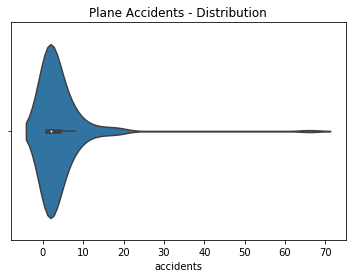

In [35]:
sns.violinplot(x='accidents', data = accidents).set_title('Plane Accidents - Distribution')

In [5]:
accidents.describe()

,accidents
count,122.000000
mean,3.950820
std,6.802834
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,66.000000


According to the violin plot, the data is largely skewed left, meaning most countries have a low count of accidents rather than high.

The average number of plane accidents of all countries is approximately 4.  
The minimum number of accidents is 1; the maximum is 66.  
The interquartile range is relatively narrow, ranging from 1 to 4.

Text(0.5, 1.0, 'Plane Accidents by Country')

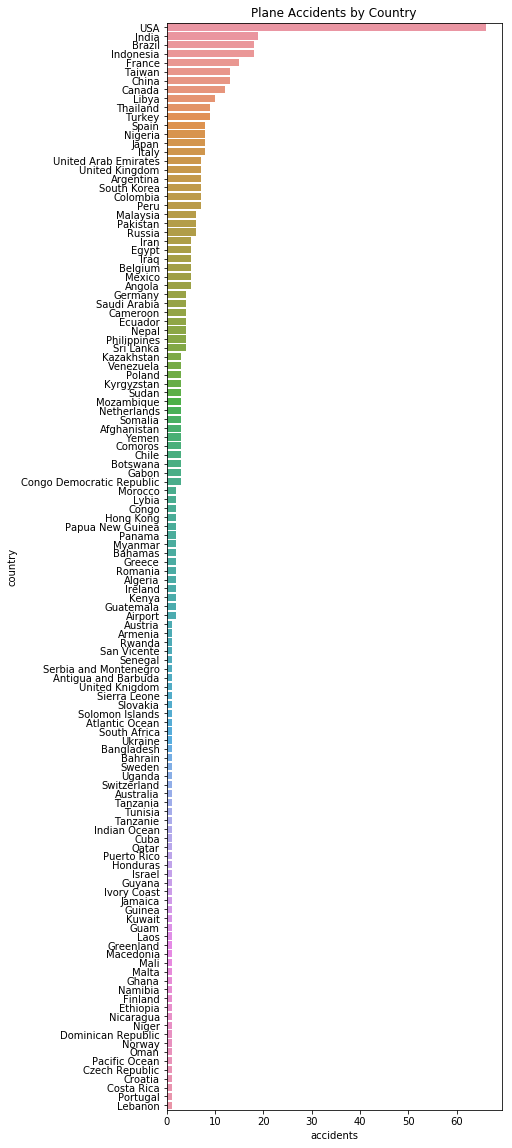

In [6]:
# order from greatest to least number of accidents
accidents.sort_values(by='accidents', ascending=False, inplace=True)

# bar plot
plt.figure(figsize=(6, 20))
sns.barplot(x='accidents',y='country', data=accidents).set_title('Plane Accidents by Country')

## 1.2 Potential Data Enhancements

This dataset may be further enhanced with auxiliary information regarding:
1. Number of flights to and from each country
2. Severity of each accident (in regards to damage to the aircraft/property in dollar amounts, fatality count)
3. Cause of each accident
4. Size of aircraft involved in the accident
5. Timing of the accidents (year over year)
6. Timeline of aircraft technology developments  
  
These details would provide further context that could lead to clearer descriptions of aircraft safety per country.

Since this information is a cumulative total, having an understanding of the details described above would allow the given information to be normalized. For example, the US has the most number of accidents, but also likely has many times more flights and, therefore, accident potential, compared to other, smaller countries. As such, it would be imprecise to measure risk based solely on the absolute count.

In addition, information regarding timing would allow for trend analysis year-over-year, which would allow for projections into the future with greater accuracy. Though research on past events is useful, predictions of future risk would prove to be far more valuable to insurance agencies, airline investors, and passengers.

According to a study performed by Boeing, the majority of serious accidents occur during the landing phase of flights. Assuming this to be true, I would be interested in looking at the differences between airports in each country in order to see if there are any major factors in play (e.g. typical weather conditions, tarmac quality, air traffic control protocol, etc.)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Source: http://www.boeing.com/resources/boeingdotcom/company/about_bca/pdf/statsum.pdf

# 2. Travel Insurance

# 2.1 Analysis of Travel Insurance Dataset

The following analysis dissects the Travel Insurance dataset from 3 points of view with regards to net sales and claim statuses:
1. Customers
2. Agencies
3. Flights

## 2.1.1 Customer Analysis

Text(0.5, 1.0, 'Travel Insurance Items by Age, Gender')

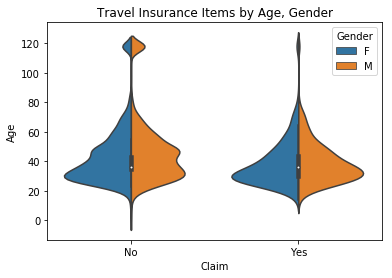

In [34]:
sns.violinplot(x='Claim', y='Age', hue='Gender', split=True, data=insurance).set_title('Travel Insurance Items by Age, Gender')

* It would appear that the most common age of purchasers of travel insurance is around 40 years old.  
This may be because people travel the most during their middle-ages. Or because, realistically, in a family dynamic, the parents would be the ones most likely to purchase travel insurance for everyone (including kids and grandparents).
As such, it may make sense to group customers by age during analysis

* Little variation between genders.

* There also appears to be a surprising number of incredibly elderly (close to 120 years old) passengers purchasing travel insurance, which I would be suspicious of, especially considering there are few to no passengers with ages approximately between 80 and 120 years old.

In [8]:
elderly_agency = insurance[insurance['Age'] > 90].groupby(['Age','Agency'])
elderly_agency = elderly_agency.agg({'Agency':'count'})
elderly_agency.rename(columns={'Agency':'Count'}, inplace=True)
elderly_agency

Count
Age Agency       
118 ADM         1
    ART        59
    CCR        47
    CWT         2
    EPX        40
    JWT       749
    JZI        68
    SSI        18

In fact, the only passengers older than 90 years old, are all 118 years old and the vast majority purchased from JWT.  
It is possible that 118 is the default designation for unknown ages; a weird default, especially with so many agencies following the same practice. Otherwise, this may be an issue with how the data was sampled.

In [9]:
# bucket ages
insurance['Age Group'] = pd.cut(insurance['Age'], 4, labels=['Young','Middle-Aged','Senior','118'])

In [10]:
agegroup = insurance.groupby('Age Group')
agegroup[['Age','Net Sales']].describe()

Age                                                           \
               count        mean       std    min    25%    50%    75%    max   
Age Group                                                                       
Young         7768.0   25.490989  3.220360    0.0   24.0   26.0   28.0   29.0   
Middle-Aged  51377.0   39.023785  6.789628   30.0   36.0   36.0   42.0   59.0   
Senior        3197.0   66.339693  5.707654   60.0   62.0   65.0   69.0   88.0   
118            984.0  118.000000  0.000000  118.0  118.0  118.0  118.0  118.0   

            Net Sales                                                         
                count       mean        std     min   25%   50%   75%    max  
Age Group                                                                     
Young          7768.0  42.820475  57.824914 -389.00  17.0  26.0  49.0  682.0  
Middle-Aged   51377.0  39.848661  46.340612 -297.00  18.0  26.0  48.0  666.0  
Senior         3197.0  46.499515  62.522662 -291.75  20.0  29.0  45.0  599.0  
118             984.0  49.698079  45.509445  -93.00  31.0  39.0  60.0  810.0

Text(0.5, 1.0, 'Distribution of Net Sales by Age Group')

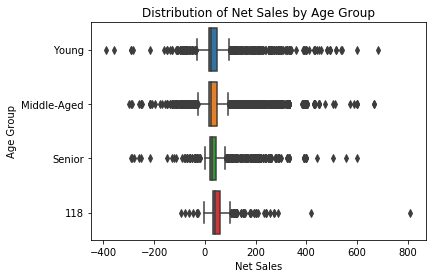

In [11]:
sns.boxplot(x='Net Sales', y='Age Group', data=insurance).set_title('Distribution of Net Sales by Age Group')

Text(0.5, 1.0, 'Number of Claims by Age Group')

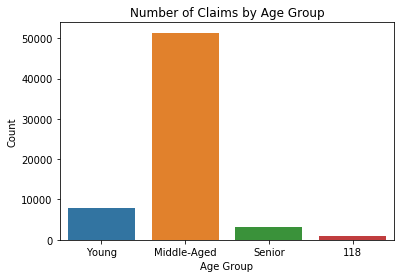

In [12]:
agegroup = agegroup.agg({'Claim':'count'})
agegroup.rename(columns={'Claim':'Count'}, inplace=True)
agegroup.reset_index(inplace=True)

sns.barplot(x='Age Group', y='Count', data=agegroup).set_title('Number of Claims by Age Group')

## 2.1.2 Agency Analysis

### 2.1.2.1 Overall Agency View

Text(0.5, 1.0, 'Number of Claims by Agency Type')

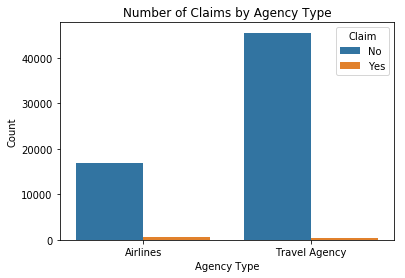

In [13]:
# Agency Type comparison
agencytype = insurance.groupby(['Agency Type','Claim'])
agencytype_claimcount = agencytype.agg({'Claim':'count'})
agencytype_claimcount.rename(columns={'Claim':'Count'}, inplace=True)
agencytype_claimcount.reset_index(inplace=True)
sns.barplot(x='Agency Type', y='Count', hue='Claim', data=agencytype_claimcount).set_title('Number of Claims by Agency Type')

Text(0.5, 1.0, 'Count of Sales by Agency')

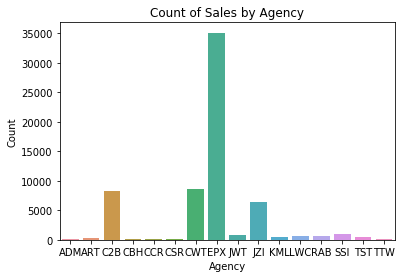

In [14]:
# Largest agency by number of purchases
agency = insurance.groupby(['Agency'])
agency_count = agency.agg({'Agency':'count'})
agency_count.rename(columns={'Agency':'Count'}, inplace=True)
agency_count.reset_index(inplace=True)

sns.barplot(x='Agency', y='Count', data=agency_count).set_title('Count of Sales by Agency')

Text(0.5, 1.0, 'Total Revenue by Agency')

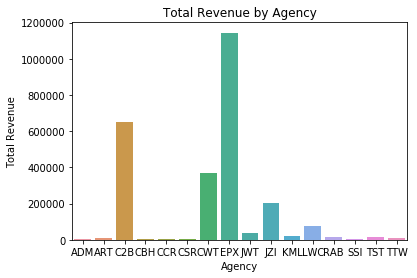

In [15]:
# Largest agency by total revenue
agency_sum = agency.agg({'Net Sales':'sum'})
agency_sum.rename(columns={'Net Sales':'Total Revenue'}, inplace=True)
agency_sum.reset_index(inplace=True)

sns.barplot(x='Agency', y='Total Revenue', data=agency_sum).set_title('Total Revenue by Agency')

Text(0.5, 1.0, 'Revenue per Sale by Agency')

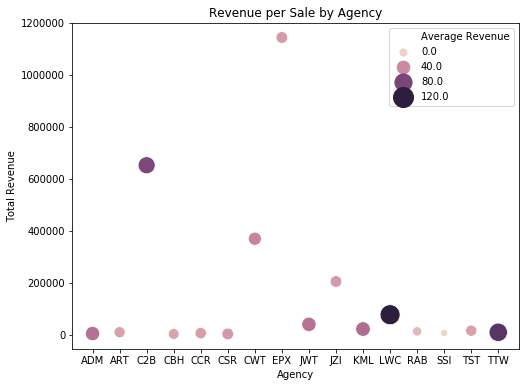

In [16]:
# Average Revenue per Purchase by Agency
agency_countSum = agency_count.merge(agency_sum, on='Agency')
agency_countSum['Average Revenue'] = agency_countSum['Total Revenue']/agency_countSum['Count']
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Agency', y='Total Revenue', hue='Average Revenue', size='Average Revenue', data=agency_countSum, 
                sizes=(50, 400)).set_title('Total Revenue, Average Revenue by Agency')

### 2.1.2.2 Per Agency View

What demographic does each agency typically attact?

In [17]:
# Analysis of Agency customer demographics
agency_age = insurance.groupby(['Agency','Age Group']).agg({'Age Group':'count'})
agency_age

Age Group
Agency Age Group             
ADM    Young               79
       Middle-Aged          2
       118                  1
ART    Young                3
       Middle-Aged        267
       Senior               2
       118                 59
C2B    Young             2538
       Middle-Aged       5035
       Senior             694
CBH    Young               19
       Middle-Aged         20
       Senior              62
CCR    Young               33
       Middle-Aged         44
       Senior              70
       118                 47
CSR    Young               17
       Middle-Aged         18
       Senior              51
CWT    Young              929
       Middle-Aged       7165
       Senior             484
       118                  2
EPX    Young             2965
       Middle-Aged      31370
       Senior             744
       118                 40
JWT    118                749
JZI    Young              792
       Middle-Aged       4756
       Senior             713
       118                 68
KML    Young                1
       Middle-Aged        390
       Senior               1
LWC    Young              140
       Middle-Aged        485
       Senior              64
RAB    Young              145
       Middle-Aged        474
       Senior             106
SSI    Middle-Aged       1038
       118                 18
TST    Young               86
       Middle-Aged        248
       Senior             194
TTW    Young               21
       Middle-Aged         65
       Senior              12

In [18]:
# Breakout of Destinations each Agency services
agency_dest = insurance.groupby(['Agency','Destination']).agg({'Destination':'count'})
agency_dest

Destination
Agency Destination                           
ADM    FRANCE                              52
       GERMANY                              1
       INDONESIA                            6
       IRELAND                              1
       ITALY                                2
       MALAYSIA                             1
       MEXICO                               1
       MOROCCO                              3
       NETHERLANDS                          9
       RUSSIAN FEDERATION                   1
       SPAIN                                1
       SWITZERLAND                          1
       UNITED KINGDOM                       3
ART    CAMBODIA                            14
       CHINA                               29
       DENMARK                              1
       EGYPT                                1
       FRANCE                               1
       HONG KONG                           19
       INDIA                                2
       INDONESIA                            6
       IRAN, ISLAMIC REPUBLIC OF            3
       JAPAN                                1
       KOREA, REPUBLIC OF                   2
       MACAO                                1
       MALAYSIA                            40
       MYANMAR                              5
       NEPAL                                2
       PHILIPPINES                        103
       SINGAPORE                           24
...                                       ...
LWC    POLAND                               2
       QATAR                                1
       SOUTH AFRICA                         2
       SPAIN                                3
       SRI LANKA                           12
       SWEDEN                               1
       SWITZERLAND                          5
       TAIWAN, PROVINCE OF CHINA           25
       THAILAND                            53
       TURKEY                               1
       UNITED ARAB EMIRATES                 3
       UNITED KINGDOM                      23
       UNITED STATES                      199
       VIET NAM                            12
RAB    AUSTRALIA                            5
       BRUNEI DARUSSALAM                  710
       CHINA                                1
       HONG KONG                            2
       MALAYSIA                             5
       PHILIPPINES                          1
       SAUDI ARABIA                         1
SSI    SINGAPORE                         1056
TST    MALAYSIA                           249
       THAILAND                           279
TTW    AUSTRALIA                           19
       HONG KONG                            3
       MALAYSIA                             1
       SINGAPORE                           73
       SWEDEN                               1
       THAILAND                             1

[410 rows x 1 columns]

Interestingly, JWT has 749 sales - all of which for 118 year olds travelling to India, 99.47% not resulting in a claim.

In [19]:
# Calculate Claim Status proporations per Agency
agency_claim = insurance.groupby(['Agency','Claim']).agg({'Claim':'count'})
agency_claim.rename(columns={'Claim':'Count'}, inplace=True)

agency_total = insurance.groupby(['Agency']).agg({'Claim':'count'})
agency_total.rename(columns={'Claim':'Total Purchases'}, inplace=True)


agency_claim = agency_claim.join(agency_total, how='outer', on='Agency')
agency_claim['% of Total'] = round(agency_claim['Count'] / agency_claim['Total Purchases'] * 100, 2)

agency_claim

Count  Total Purchases  % of Total
Agency Claim                                    
ADM    No        82               82      100.00
ART    No       330              331       99.70
       Yes        1              331        0.30
C2B    No      7720             8267       93.38
       Yes      547             8267        6.62
CBH    No       100              101       99.01
       Yes        1              101        0.99
CCR    No       191              194       98.45
       Yes        3              194        1.55
CSR    No        85               86       98.84
       Yes        1               86        1.16
CWT    No      8494             8580       99.00
       Yes       86             8580        1.00
EPX    No     34924            35119       99.44
       Yes      195            35119        0.56
JWT    No       745              749       99.47
       Yes        4              749        0.53
JZI    No      6298             6329       99.51
       Yes       31             6329        0.49
KML    No       384              392       97.96
       Yes        8              392        2.04
LWC    No       653              689       94.78
       Yes       36              689        5.22
RAB    No       724              725       99.86
       Yes        1              725        0.14
SSI    No      1049             1056       99.34
       Yes        7             1056        0.66
TST    No       526              528       99.62
       Yes        2              528        0.38
TTW    No        94               98       95.92
       Yes        4               98        4.08

Very few insurance purchases result in a claim; the vast majority of agencies have less then 5% of sales result in a claim.

## 2.1.3 Claims Analysis

In [20]:
# Overall Claim Activation Rate
insurance['Claim_bool'] = np.where(insurance['Claim'] == 'Yes', 1, 0)

percent = round(insurance['Claim_bool'].sum() / insurance['Claim'].count() * 100,2)
print('{}% of all claims are activated.'.format(percent))

1.46% of all claims are activated.


In [21]:
def calcClaimActivationRate(df, field):
    df_grouped = df.groupby(field)
    df_grouped = df_grouped.agg({'Claim':'count','Claim_bool':'sum'})
    df_grouped.reset_index(inplace=True)
    df_grouped.rename(columns={'Claim':'Total Claims', 'Claim_bool':'Count of Activated Claims'}, inplace=True)

    df_grouped['Claim Activation Rate'] = df_grouped['Count of Activated Claims'] / df_grouped['Total Claims'] * 100

    return df_grouped

In [22]:
# Calculate Claim Activation Rate by Age
age = calcClaimActivationRate(insurance, 'Age')

# filter for ages with at least 500 claims and sort
age = age[age['Total Claims'] >= 100]
age.sort_values(by='Claim Activation Rate', ascending = False, inplace=True)
age.head(10)

,Age,Total Claims,Count of Activated Claims,Claim Activation Rate
68,69,177,7,3.954802
71,72,105,4,3.809524
29,30,1341,47,3.504847
27,28,1255,42,3.346614
23,24,626,20,3.194888
31,32,1082,34,3.142329
25,26,987,30,3.039514
21,22,521,14,2.687140
22,23,525,14,2.666667
26,27,1065,28,2.629108


Text(0.5, 1.0, 'Claim Activation Rate by Age')

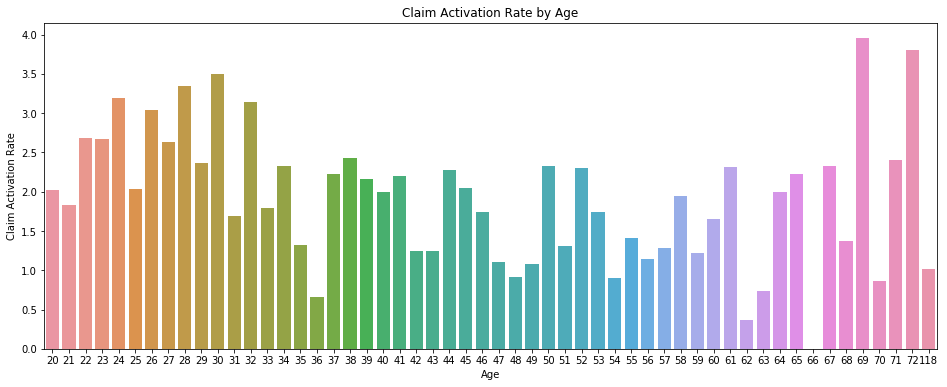

In [23]:
plt.figure(figsize=(16, 6))
sns.barplot(x='Age', y='Claim Activation Rate', data=age).set_title('Claim Activation Rate by Age')

Passengers aged 22-32 as well as 69 and 72 have the highest claim activation rates.

In [24]:
# which ages purchase the most insurance
age.sort_values(by='Total Claims', ascending = False, inplace=True)
age.head(5)

,Age,Total Claims,Count of Activated Claims,Claim Activation Rate
35,36,24142,160,0.662745
30,31,2663,45,1.689824
47,48,2405,22,0.914761
34,35,2348,31,1.320273
29,30,1341,47,3.504847


Text(0.5, 1.0, 'Count of Claims Sales by Age')

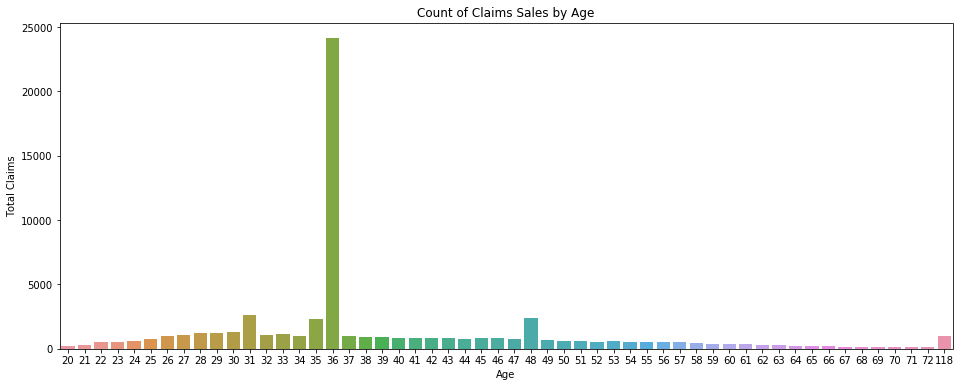

In [25]:
plt.figure(figsize=(16, 6))
sns.barplot(x='Age', y='Total Claims', data=age).set_title('Count of Claims Sales by Age')

36 year olds purchase the most insurance, by far - almost 10x as much as the second-most insured age.

In [26]:
# Calculate Claim Activation Rate by Age Group
ageGroup = calcClaimActivationRate(insurance, 'Age Group')
ageGroup.sort_values(by='Claim Activation Rate', ascending = False, inplace=True)
ageGroup.head(10)

,Age Group,Total Claims,Count of Activated Claims,Claim Activation Rate
0,Young,7768,210,2.703399
2,Senior,3197,57,1.782921
1,Middle-Aged,51377,650,1.265158
3,118,984,10,1.016260


Though Middle-Aged passengers purchase more insurance packages, younger passengers have higher claim rates.

In [27]:
# Calculate Claim Activation Rate by Gender
gender = calcClaimActivationRate(insurance, 'Gender')
gender.sort_values(by='Claim Activation Rate', ascending = False, inplace=True)
gender

,Gender,Total Claims,Count of Activated Claims,Claim Activation Rate
0,F,8872,346,3.899910
1,M,9347,293,3.134696


Quite similar between genders, with females having a slightly higher activation rate.

In [28]:
# Calculate Claim Activation Rate by Destination
dest = calcClaimActivationRate(insurance,'Destination')
dest.sort_values(by='Claim Activation Rate', ascending = False, inplace=True)
dest.head(5)

,Destination,Total Claims,Count of Activated Claims,Claim Activation Rate
28,COSTA RICA,7,1,14.285714
20,BULGARIA,12,1,8.333333
2,ARGENTINA,22,1,4.545455
118,SINGAPORE,13255,562,4.239909
121,SOUTH AFRICA,162,5,3.086420


In [29]:
# Total Claims Count by Destination
dest.sort_values(by='Count of Activated Claims', ascending = False, inplace=True)
dest.head(5)

,Destination,Total Claims,Count of Activated Claims,Claim Activation Rate
118,SINGAPORE,13255,562,4.239909
26,CHINA,4796,46,0.959133
4,AUSTRALIA,3694,38,1.028695
140,UNITED STATES,2530,37,1.462451
129,THAILAND,5894,34,0.576858


## 2.2 Travel Insurance Key Business Insights

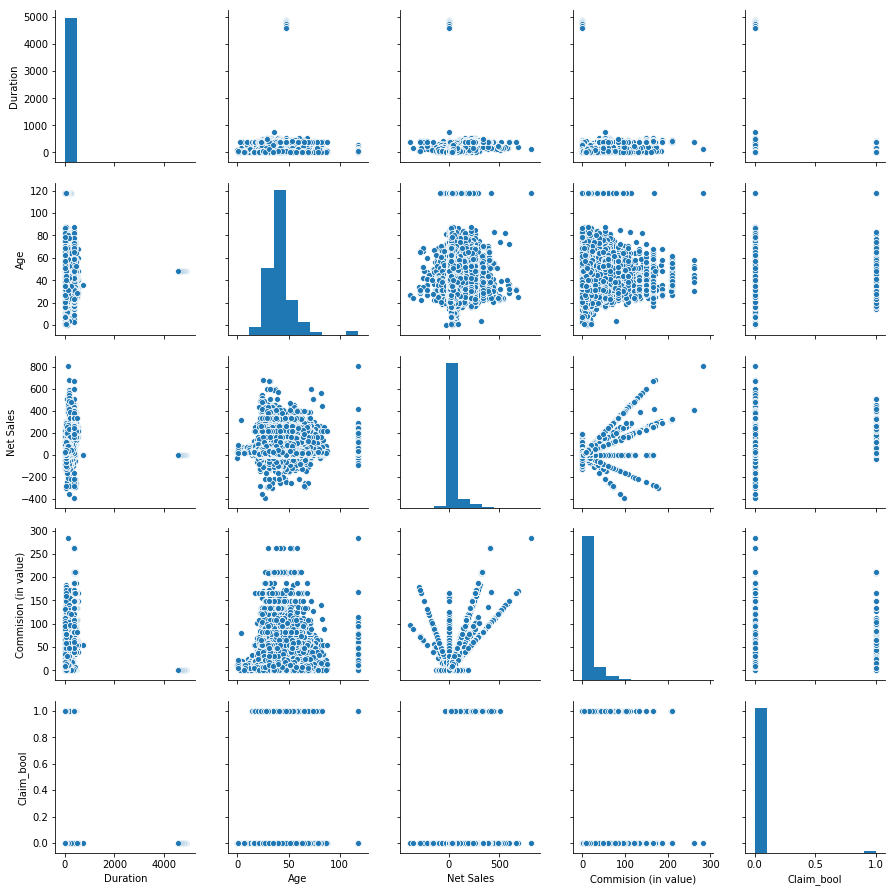

In [30]:
# Analysis of relationships between metrics
sns.pairplot(insurance[['Duration','Age','Net Sales','Commision (in value)','Claim_bool']])

In [31]:
# Correlation Analysis
insurance[['Duration','Age','Net Sales','Commision (in value)','Claim_bool']].corr()

,Duration,Age,Net Sales,Commision (in value),Claim_bool
Duration,1.000000,0.002468,0.429235,0.344772,0.073607
Age,0.002468,1.000000,0.037756,0.118348,-0.011614
Net Sales,0.429235,0.037756,1.000000,0.651315,0.133931
Commision (in value),0.344772,0.118348,0.651315,1.000000,0.098696
Claim_bool,0.073607,-0.011614,0.133931,0.098696,1.000000


In [32]:
# Ages without any claims
age = calcClaimActivationRate(insurance, 'Age')
age = age[age['Count of Activated Claims'] == 0]
age['Age']

0      0
1      1
2      2
3      3
4      4
5      5
6      7
7      8
8      9
9     10
10    11
11    12
12    13
14    15
65    66
77    78
78    79
79    80
81    82
83    84
84    85
85    86
86    87
87    88
Name: Age, dtype: int64

More specifically, the youngest passengers (0-15) have not activated any claims nor have the most senior passengers (65+), excluding 118 year olds.

# 2.1.1 Business Impacts
According to correlation matrix, there are no metrics with a strong direct correlation with Claim Status.
However, there appear to be a few clusters that have not had any claims such as the youngest passengers as well as passengers with flight durations greater than 4,000. These passengers are the least risky. Would recommend considering lowered prices for these passenger types to attract more customers, depending on price-elasticity of products.

Middle-Aged Customers (ages 30-59) have the most purchases, but the Young age group has the higher activation rate. Taking into account how no passengers 0-15 years old have any claims, passengers between 16 and 29 are the riskiest customers.

Claim activation rates are highly similar between genders. 

Destination-wise, Singapore is the riskiest destination with over 4% of sales resulting in an activated claim.

Concerning Net Sales and Commision, there are various linear relationships, which likely represent the different agencies and their respective commission rates. This information may be useful for agencies to see what their competitors are 

The records with negative Net Sales amounts are likely instances of refunds. May be useful to dig into these items to see if there are any scenarios that have more instances of refunds in order to potentially identify causes. Solving this issue would reduce administrative costs and improve profitability.

For agencies, EPX is dominating the market in terms of quantity of sales but C2B and LWC may be more profitable.

Between Airlines and Travel Agencies, Airlines have fewer sales but more activated claims.

For customers, with only 1.46% of all sales resulting in a claim, insurance packages should only be purchased if the price is less than 1.46% of the potential cost. (Perhaps more if risk-averse) Since insurance is typically purchased to cover flight cancellation, the potential cost would be the price of the flight ticket.

_Product Type was not analyzed in this report. A valuable enhancement to this data would be to take a closer look at the various products offered by each agency, compare coverage as well as Net Sales price.  
Distribution Channel was also not looked at in-depth as there were so few instances of Offline sales versus Online._

# 3. Connections between Plane Accidents and Travel Insurance

Disclaimer - I would recommend being hesitant about drawing connections between plane accidents and travel insurance as travel insurance packages are mostly used by customers to cover ticket costs of flight cancellations, flight interruptions, as well as baggage loss/damage rather than plane accidents/crashes.

## 3.1 SQL Exercise
Write (and show us) a SQL query that would output the following stats for each country in the plane_accidents.csv file :
1. number of accidents
2. net sales (from the travel insurance data)
3. net sales for the insured who are aged 50 or under
4. net sales for the insured who are over 50 years in age

*Interpreting as: limit all queries to countries listed in the plane_accidents.csv file and group by country*

1. SELECT * FROM PLANE_ACCIDENTS;  
2. SELECT DESTINATION, SUM(NET_SALES) FROM TRAVEL_INSURANCE  
&nbsp;&nbsp;&nbsp;&nbsp;WHERE REPLACE(DESTINATION, ' ', '') IN (SELECT REPLACE(UPPER(COUNTRY), ' ', '') FROM PLANE_ACCIDENTS) 
&nbsp;&nbsp;&nbsp;&nbsp;GROUP BY DESTINATION;
3. SELECT DESTINATION, SUM(NET_SALES) FROM TRAVEL_INSURANCE  
&nbsp;&nbsp;&nbsp;&nbsp;WHERE AGE <= 50 AND  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;REPLACE(DESTINATION, ' ', '') IN (SELECT REPLACE(UPPER(COUNTRY), ' ', '') FROM PLANE_ACCIDENTS)  
&nbsp;&nbsp;&nbsp;&nbsp;GROUP BY DESTINATION;
4. SELECT DESTINATION, SUM(NET_SALES) FROM TRAVEL_INSURANCE  
&nbsp;&nbsp;&nbsp;&nbsp;WHERE AGE > 50 AND  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;REPLACE(DESTINATION, ' ', '') IN (SELECT REPLACE(UPPER(COUNTRY), ' ', '') FROM PLANE_ACCIDENTS)  
&nbsp;&nbsp;&nbsp;&nbsp;GROUP BY DESTINATION;